# Regresi Linier
<p>Metode  regresi  linier  adalah  suatu  cara  untuk menentukan   hubungan   antara   variabel   terikat (tidak  bebas)  terhadap  variabel  bebas.  Kedua variabel   ini   apabila   dinyatakan   dalam   bentuk kurva akan berupa garis lurus.  Metode ini dibuat dengan cara uji  coba  (trial  and  error),  dimana bentuk    persamaan    yang    didapatkan    harus dilakukan   uji   statistik   yang   meliputi   koefisien korelasi  (R),  koefisien  determinasi  (R2),  faktor penyimpangan  (standard  deviation),  dan  tingkat konvergensi (C).</p>

### Import library

In [1]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression #Library untuk Regresi Linier
from sklearn.metrics import mean_squared_error #Library MSE
from sklearn.metrics import mean_absolute_percentage_error #Library MAPE
from sklearn.ensemble import IsolationForest #Library untuk mencari data Outlier

In [2]:
data = pd.read_csv("C:/Users/hangg/Downloads/Random Aslab/DSDA/Material/Gold Futures Historical Data.csv", sep=";") #Sesuaikan dengan directory file masing-masing

In [3]:
data.head(4)

,Date,Price,Open,High,Low,Volume,Volatility,Fluktuasi
0,2021,"1,818.55","1,781.25","1,820.45","1,758.90",222.61K,"1,9",Naik
1,2021,"1,783.90","1,757.20","1,815.50","1,745.40",3.92M,"1,5",Naik
2,2021,"1,757.00","1,816.70","1,836.90","1,721.10",3.65M,"-3,4",Turun
3,2021,"1,818.10","1,817.00","1,835.90","1,677.90",3.66M,"0,3",Netral


In [4]:
data.describe()

,Date
count,179.000000
mean,2013.960894
std,4.312724
min,2007.000000
25%,2010.000000
50%,2014.000000
75%,2018.000000
max,2021.000000


### Pre-processing
Pre-processing adalah suatu kegiatan untuk membersihkan data sebelum diolah lebih lanjut seperti 
<ol>
    <li>Mengganti tipe data kolom</li>
    <li>Menghilangkan data noise seperti data kosong/num</li>
    <li>Mengganti data noise menjadi nilai kalkulasi rata-rata atau median (khusus kolom tipe data berupa angka)</li>
    <li>Menghilangkan data outlier yang sekiranya akan mengganggu proses pengolahan data</li>
    <li>Dan lainnya</li>
</ol>

In [5]:
data.dtypes

Date           int64
Price         object
Open          object
High          object
Low           object
Volume        object
Volatility    object
Fluktuasi     object
dtype: object

In [6]:
data['Price'] = data['Price'].str.replace(',', '').astype(float)
data['Open'] = data['Open'].str.replace(',', '').astype(float)
data['High'] = data['High'].str.replace(',', '').astype(float)
data['Low'] = data['Low'].str.replace(',', '').astype(float)
data['Volatility'] = data['Volatility'].str.replace(',', '.').astype(float)

### Setelah Pre-Processing

In [7]:
data.dtypes

Date            int64
Price         float64
Open          float64
High          float64
Low           float64
Volume         object
Volatility    float64
Fluktuasi      object
dtype: object

In [8]:
data.describe()

,Date,Price,Open,High,Low,Volatility
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2013.960894,1331.139385,1327.106983,1366.603631,1290.482123,0.715642
std,4.312724,315.711490,318.376190,325.603855,308.757162,5.076547
min,2007.000000,648.100000,640.400000,655.500000,607.000000,-18.000000
25%,2010.000000,1181.400000,1181.400000,1209.650000,1160.300000,-2.550000
50%,2014.000000,1334.300000,1333.100000,1350.200000,1309.000000,0.400000
75%,2018.000000,1562.850000,1554.400000,1579.500000,1511.100000,3.700000
max,2021.000000,2017.100000,2026.900000,2120.000000,1913.000000,13.900000


## Pengolahan Data

In [9]:
avg_gold_price = data.groupby('Date')['Price'].mean() #Mencari rata-rata harga untuk dikelompokkan berdasarkan tahun

In [10]:
print('Rata-rata harga emas per tahun\n',avg_gold_price)

Rata-rata harga emas per tahun
 Date
2007     705.483333
2008     876.775000
2009     984.783333
2010    1237.783333
2011    1574.075000
2012    1676.325000
2013    1394.400000
2014    1263.933333
2015    1234.533333
2016    1305.200000
2017    1345.766667
2018    1352.216667
2019    1453.883333
2020    1805.750000
2021    1794.822727
Name: Price, dtype: float64


In [11]:
x=avg_gold_price.index
y=avg_gold_price.values

Text(0, 0.5, 'Rata-Rata Harga Emas')

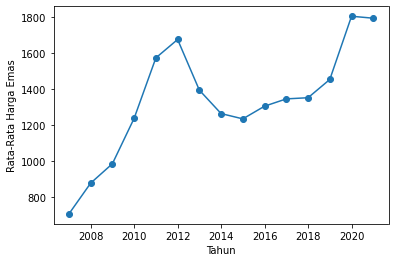

In [12]:
plt.scatter(x, y)
plt.plot(x, y)
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Harga Emas')

<b> ============================================================================================================= </b>

### Regresi Linier Sederhana

In [13]:
linreg=LinearRegression()
x=np.array(x).reshape(-1,1) #Data tahun dimasukkan kedalam ordo matrix n*1
linreg.fit(x, y)

LinearRegression()

In [14]:
Gold_2022=np.array(2022).reshape(-1,1) #Membuat data tahun baru yaitu tahun 2022
pred_ipm=linreg.predict(Gold_2022)

In [15]:
print('\nPrediksi rata-rata Harga Emas tahun 2022 =\n', pred_ipm.item())


Prediksi rata-rata Harga Emas tahun 2022 =
 1745.584473304465


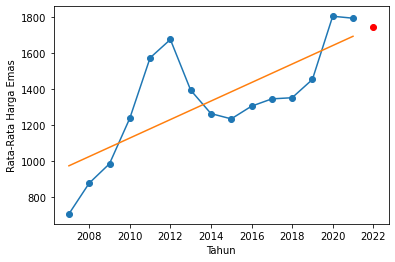

In [16]:
plt.scatter(x, y)
plt.plot(x, y)
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Harga Emas')
plt.scatter(Gold_2022, pred_ipm, c='red')
pred_y=linreg.predict(x)
plt.plot(x, pred_y)
plt.show()

In [17]:
MSE=mean_squared_error(y,pred_y)
MAPE = mean_absolute_percentage_error(y, pred_y)
print('MSE = ', MSE)
print('MAPE =', MAPE)

MSE =  42465.96491878395
MAPE = 0.13937679418940804


### Penjelasan Hasil Regresi Linier Sederhana
Banyak sekali indikator rangkuman hasil olah data akan tetapi yang paling banyak digunakan adalah indikator <b>MSE (Mean Squared Error) dan MAPE (Mean Absolute Percentage Error) </b> <br> Diantara 2 indikator di atas indikator MAPE yang paling mudah interpretasinya yaitu sebagai berikut <br> Terlihat bahwa hasil output dari MAPE adalah 0.139xxx yang dimana hasil dari output tersebut cukup dikali 100% untuk mengetahui berapakah tingkat persentase kesalahan dari ke-akuratan peramalan menggunakan regresi linier, jadi hasil tingkat persentase kesalahannya adalah <br> <code> 0.139xxx * 100% = 13.9xxx% </code> <br> Terbukti bahwa hasil tingkat persentase kesalahan dari peramalan menggunakan regresi linier adalah sebesar <b>13.9%</b> <br> <b>lebih baik jika hasil tingkat persentase kesalahan kurang dari 10%</b>

<b> ============================================================================================================= </b>

## Data Outlier
Data Outlier adalah data pengamatan yang menyimpang dari rata-rata data pengamatan yang lain

In [18]:
dataIso = data[['Date','Volatility']] #Mengambil 2 kolom dari data yang diolah untuk mencari outlier dari volatility

In [19]:
clf = IsolationForest(contamination=0.2) #Contamination adalah seberapa besar tingkat toleransi data yang menyimpang
pred = clf.fit_predict(dataIso)

In [20]:
dataIso['Outlier']=pred.reshape(-1,1) #Data outlier dimasukkan kedalam ordo matrix n*1

<ipython-input-20-01a88242edc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataIso['Outlier']=pred.reshape(-1,1)


In [21]:
print(dataIso)

     Date  Volatility  Outlier
0    2021         1.9        1
1    2021         1.5        1
2    2021        -3.4       -1
3    2021         0.3       -1
4    2021         2.3       -1
..    ...         ...      ...
174  2007        -2.9       -1
175  2007         2.6        1
176  2007        -1.0        1
177  2007         2.7        1
178  2007         2.6        1

[179 rows x 3 columns]


<b> Data yang termasuk outlier memiliki value -1 </b>

In [22]:
dataOutlier = dataIso['Volatility'].loc[dataIso['Outlier']==-1]
print('Data yang termasuk outlier:\n', dataOutlier.value_counts())

Data yang termasuk outlier:
  13.6    2
 2.3     1
 11.0    1
 10.5    1
 0.3     1
-7.0     1
 6.6     1
-11.4    1
-4.2     1
 9.6     1
 8.3     1
-7.2     1
-3.4     1
 9.9     1
 12.3    1
-1.0     1
 13.9    1
-12.1    1
 0.9     1
-2.0     1
-18.0    1
 7.7     1
-6.9     1
-5.8     1
-2.7     1
-7.7     1
 6.7     1
-2.9     1
-9.3     1
 10.0    1
 3.1     1
-6.5     1
 10.4    1
-10.3    1
-7.3     1
Name: Volatility, dtype: int64


In [23]:
dataNoOutlier = dataIso['Volatility'].loc[dataIso['Outlier']==1]
print('Data yang tidak termasuk outlier:\n', dataNoOutlier.value_counts())

Data yang tidak termasuk outlier:
  2.6    5
 0.4    5
 3.7    4
-0.7    3
-0.3    3
       ..
-5.5    1
 2.0    1
 3.6    1
-3.4    1
 4.8    1
Name: Volatility, Length: 90, dtype: int64


Text(0.5, 1.0, 'Outlier Volatility Emas')

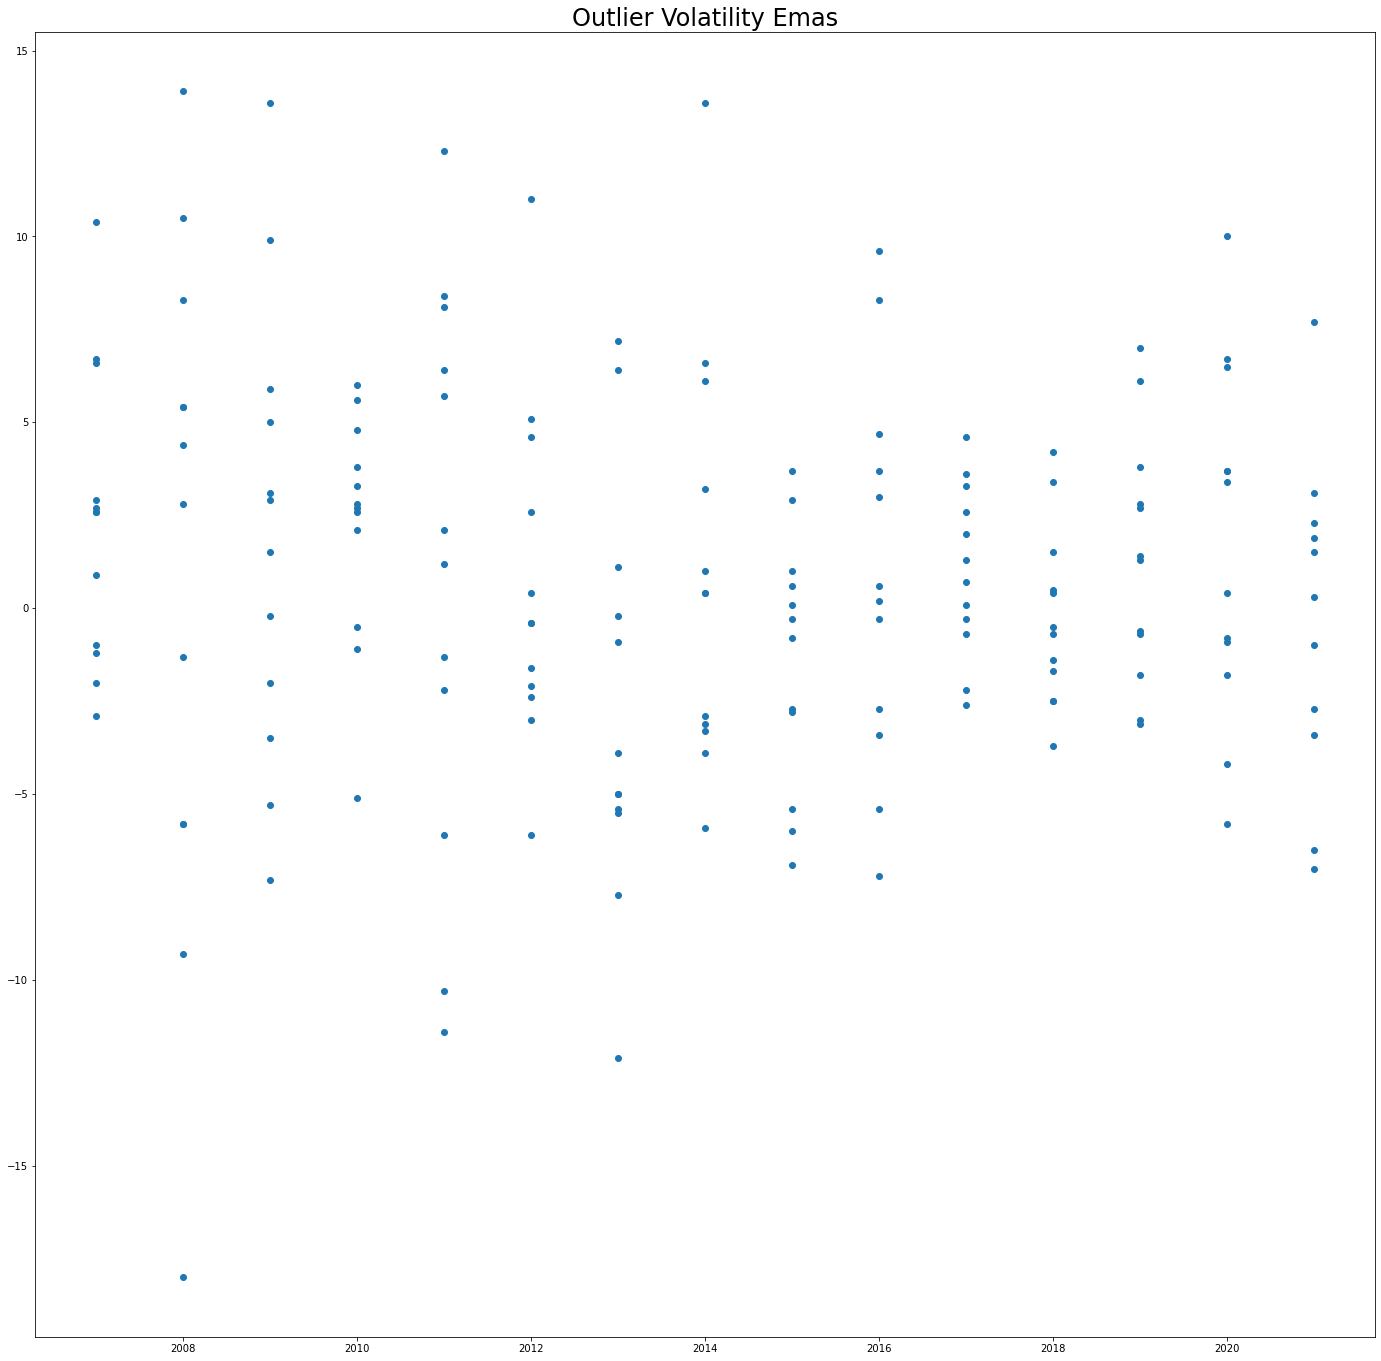

In [24]:
plt.figure(figsize=(24,24))
plt.scatter(dataIso['Date'],dataIso['Volatility'])
plt.title('Outlier Volatility Emas', fontsize=24)